# **Neual Network**

Neural network is collective name of machine learning method, which cover numeral different algorithm, like Convolution Neual Network (CNN), Recurrent Neural Network (RNN), Deep Neural Network (DNN), Generative Adversarial Network (GAN)...

<img src="img/neural_network_framework.png" width="600">

The simplest neual network is called Multilayer Perceptron (MLP), which combined with one input layer, one or few hidden layer(s) and one output layer, like above structure.

#### **Forward Propogation**

<img src="img/forward_propogation.png" width="400">

Take one of neuon in first hidden layer as example, to calculated by weighted sum, 
$$s_k=\sum_{i=1}^nw_{ik}x_i$$

After activation function, can get hidden node value, 
$$h_k=f(s_k)$$

Activation function is to transform the value into the range or value we want, followings are some activation function usually used.

#### 1. ReLu

ReLu function is to get non negative velue, if weightage sum negative then output as 0. 

$$f_{ReLu}(x)=max(0,x)$$

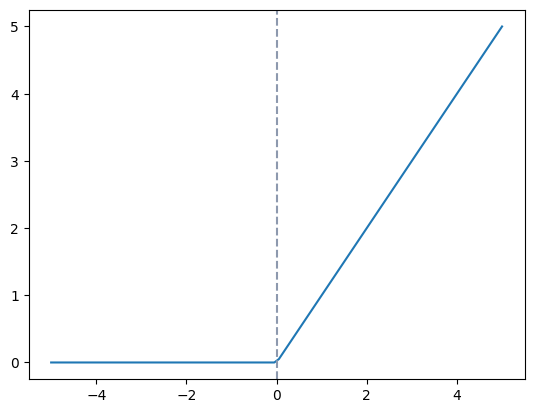

In [18]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-5, 5, 100)
y = np.array([x if x > 0 else 0 for x in X])

plt.plot(X, y)
plt.axvline(x = 0, color='#8d99ae', linestyle='dashed')

#### 2. Sigmoid

Sigmoid also used in logistic regression for classification. After apply Sigmoid, the output will be range in 0~1, and if wieghted sum is potive then range in 0.5~1; if weighated sum is negative thant range in 0~0.5.

$$f_{Sigmoid}(x) = \frac{1}{1+e^{-x}}$$

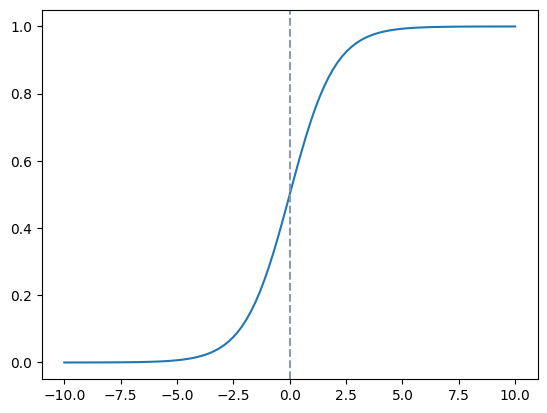

In [19]:
x = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-x))
plt.plot(x, y)
plt.axvline(x = 0, color = '#8d99ae', linestyle = '--')
plt.show()

#### 3. Tanh

Tanh is similar as Sigmoid, but Tanh is to range the output in -1~1. If wieghted sum is potive then range in 0~1; if weighated sum is negative thant range in -1~0.

$$f_{Tanh}(x) = \frac{e_{x}-e_{x}}{e^{x}+e^{x}}$$

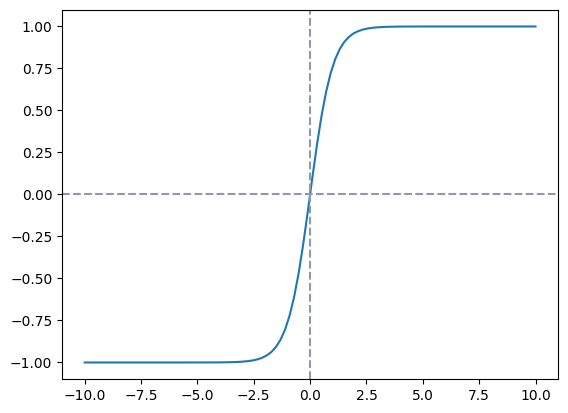

In [20]:
x = np.linspace(-10, 10, 100)
y = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
plt.plot(x, y)
plt.axvline(x = 0, color = '#8d99ae', linestyle = '--')
plt.axhline(y = 0, color = '#8d99ae', linestyle = '--')
plt.show()

#### 4. Softmax

Softmax is usally used in output layer to let the sum of the final output values to be $1$ for classfication problem to determine the predicted class.

$$f_{Softmax}(x_i) = \frac{\text{exp}(x_i)}{\sum_{i=1}^n\text{exp}(x_i)}

#### **Back Propogation**

Back propogation is to use final loss function to update paramters, usually MSE is used,

$$MSE_{(i)} = \frac{1}{2}\sum_{j=1}^{m}(\hat{y}_j^{(i)}-y_j^{(i)})^2$$

where $y_j^{(i)}$ denotes the $j_{th}\ y$ value of $i_{th}$ data, and the $2$ here is for easlier calculation after derivate.  
Besides, in the following equation, $w_{ikj}$ is represent the weighatge of $j_{th}$ nueron of $(i-1)_{th}$ layer to $k_{th}$ neuron of $i_{th}$ layer, and $s_{ik}$ as the weightage sum of $k_{th}$ neoron in $i_{th}$ layer.

By gradient descent, we can find best parameter of $w_{ikj}$  
$w_{ikj}\leftarrow+w_{ikj}-\gamma\nabla w_{ikj}$

If here is only one hidden layer, the neural network structure will be

<img src="img/neural_network_example.png" width="600">

Let work from output layer to input layer.

To get $\nabla w_{2kj}$
$$\frac{\partial{MSE^{(i)}}}{\partial{w_{2jk}}}=\frac{\partial{MSE^{(i)}}}{\partial{s_{2j}}}\frac{\partial{s_{2j}}}{\partial{w_{2kj}}}$$

$$\frac{\partial{MSE^{(i)}}}{\partial{s_{2j}}}=\frac{\partial\frac{1}{2}\sum_{j=1}^{m}(\hat{y}_j^{(i)}-y_j^{(i)})^2}{\partial{s_{2j}}}=\frac{1}{2}\frac{\partial\sum_{j=1}^{m}(f_2(s_{2k})^{(i)}-y_j^{(i)})^2}{\partial{s_{2k}}}$$
$$=\sum_{j=1}^{m}(\hat{y}_j^{(i)}-y_j^{(i)})f_2^{'}(s_j)^{(i)}$$

$$\frac{\partial{s_{2j}}}{\partial{w_{2kj}}}=\frac{\partial{\sum_{i=1}^mw_{2kj}h_{1k}}}{\partial{w_{2kj}}}=h_{1k}$$

So the derivate with repect to second weighatge $\nabla w_{2kj}$
$$\frac{\partial{MSE^{(i)}}}{\partial{w_{2jk}}}=\sum_{j=1}^{m}(\hat{y}_j^{(i)}-y_j^{(i)})f_2^{'}(s_j^{(i)})h_{1k}$$

Then to get $\nabla w_{1ik}$

$$\frac{\partial{MSE^{(i)}}}{\partial{w_{1ik}}}=\frac{\partial{MSE^{(i)}}}{\partial{s_{2j}}}\frac{\partial{s_{2j}}}{\partial{s_{1k}}}\frac{\partial{s_{1k}}}{\partial{w_{1ik}}}$$

$$\frac{\partial{s_{2j}}}{\partial{s_{1k}}}=\frac{\partial{\sum_{i=1}^mw_{2kj}f_1(s_{1k})}}{\partial{s_{1k}}}=w_{2kj}f_1^{'}(s_{1k}^{(i)})$$
$$\frac{\partial{s_{1k}}}{\partial{w_{1ik}}}=\frac{\partial{\sum_{i=1}^nw_{1ik}x_i}}{\partial{w_{1ik}}}=x_i$$

So the derivate with repect to first weighatge $\nabla w_{1ik}$

$$\frac{\partial{MSE^{(i)}}}{\partial{w_{1ik}}}=\sum_{j=1}^{m}(\hat{y}_j^{(i)}-y_j^{(i)})f_2^{'}(s_{2j}^{(i)})w_{2kj}f_1^{'}(s_{1k}^{(i)})x_i$$

In [28]:
import numpy as np

class MLP:
    def __init__(self, n_neurons: list = [10]):
        """Initialize the MLP with a given number of neurons.
        Args:
            n_neurons (list): List of integers where each integer represents the number of neurons in the hidden layers.
        """
        self.n_neurons = n_neurons

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def softmax(self, x):
        exp_x = np.exp(x)
        return exp_x / exp_x.sum(axis=1, keepdims=True)

    def forward(self, layer: np.array) -> np.array:
        """Forwardpropogation to calculate predicted y.
        Args:
            x (np.array): Input data.
        Return:
            y (np.array): Predicted target data.
        """
        self.hidden_layers[0] = layer
        for i,weight in enumerate(self.weights):
            layer = self.sigmoid(layer.dot(weight))
            self.hidden_layers[i+1]=layer
        y = self.softmax(self.hidden_layers[-1])
        return y
    
    def backward(self, y, y_pred):
        """Backpropagation algorithm to compute gradients.
        Args:
            y (np.array): Target data.
            y_pred (np.array): Predicted target_value
        """
        delta_t = (y_pred - y)*(self.hidden_layers[-1])*(1-self.hidden_layers[-1])
        for i in range(1,len(self.weights)+1):
            self.weights[-i]-=self.lr*(self.hidden_layers[-i-1].T.dot(delta_t))/self.batch_size
            delta_t = (self.hidden_layers[-i-1])*(1-self.hidden_layers[-i-1])*(delta_t.dot(self.weights[-i].T))
        

    def train(self, X: np.array, y: np.array, epochs: int=2000, lr: float=0.1, batch_size: int=16):
        """
        Train the MLP using backpropagation.
        X (np.array): Input data.
        y (np.array): Target data.
        epochs (int): Number of training epochs.
        lr (float): Learning rate for weight updates.
        batch_size (int): Size of a training mini-batch.
        """
        # Initialize hiddent layer
        self.hidden_layers = [np.empty((batch_size,X.shape[1]))] + \
                             [np.empty((batch_size,n_neuron)) for n_neuron in self.n_neurons] + \
                             [np.empty((batch_size,y.shape[1]))]
        # Initialize weights and biases
        # input layer to hidden layer, hidden layer to output layer
        if len(self.n_neurons) == 1:
             self.weights = [np.random.uniform(-1, 1, size=[X.shape[1], self.n_neurons[0]]),
                             np.random.uniform(-1, 1, size=[self.n_neurons[0], y.shape[1]])]
        else:
            self.weights = [np.random.uniform(-1, 1, size=[X.shape[1], self.n_neurons[0]])] + \
                           [np.random.uniform(-1, 1, size=[self.n_neurons[i-1], self.n_neurons[i]]) for i in range(1, len(self.n_neurons))] + \
                           [np.random.uniform(-1, 1, size=[self.n_neurons[-1], y.shape[1]])]
        self.lr = lr
        self.batch_size = batch_size

        self.losses = []

        n_samples = X.shape[0]

        for epoch in range(epochs):
            #Shuffle and select batch
            shuffle = np.random.permutation(n_samples)       
            X_batches = np.array_split(X[shuffle],n_samples/batch_size)
            y_batches = np.array_split(y[shuffle],n_samples/batch_size)

            
            loss = 0
            
            # Compute loss (mean squared error)
            for x_batch,y_batch in zip(X_batches,y_batches):
                # Forwardpropagation
                y_pred = self.forward(x_batch)  
                loss += ((-np.log(y_pred))*y_batch).sum(axis=1).mean()
                # Backwardpropogation
                self.backward(y_batch, y_pred)

            self.losses.append(loss/len(y_batch))
            
                
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')


    def predict(self, X):
        y = self.forward(X)
        return np.argmax(y, axis=1)

Epoch 0, Loss: 5.509176694351328
Epoch 100, Loss: 5.309443065375351
Epoch 200, Loss: 4.769651184979321
Epoch 300, Loss: 4.230992174844782
Epoch 400, Loss: 4.019976535003325
Epoch 500, Loss: 3.9313482550076855
Epoch 600, Loss: 3.8435207225860095
Epoch 700, Loss: 3.7428865159207234
Epoch 800, Loss: 3.6629086685323258
Epoch 900, Loss: 3.6016740591802128
Epoch 1000, Loss: 3.5548725811783677
Epoch 1100, Loss: 3.5187560183409703
Epoch 1200, Loss: 3.492578425685321
Epoch 1300, Loss: 3.4712344333148097
Epoch 1400, Loss: 3.4535536124222572
Epoch 1500, Loss: 3.4361814127991464
Epoch 1600, Loss: 3.422542498203786
Epoch 1700, Loss: 3.4105144901084543
Epoch 1800, Loss: 3.399202549661262
Epoch 1900, Loss: 3.386551454708127
Epoch 2000, Loss: 3.3724071066025187
Epoch 2100, Loss: 3.346698469873783
Epoch 2200, Loss: 3.3127804472594398
Epoch 2300, Loss: 3.262201039770181
Epoch 2400, Loss: 3.2165907837898033
Epoch 2500, Loss: 3.1624088252503846
Epoch 2600, Loss: 3.1314436249022624
Epoch 2700, Loss: 3.1064

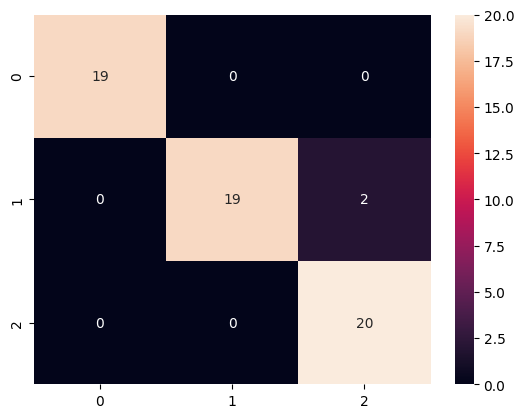

In [45]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns

data = load_iris()
X = data.data
y = data.target

ohe = OneHotEncoder()
y = ohe.fit_transform(y.reshape(-1, 1)).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

mlp = MLP([8,4])

mlp.train(X_train, y_train, epochs=5000)

y_pred = mlp.predict(X_test)

y_test = [np.argmax(i) for i in y_test]

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, annot_kws={"size": 10})


acc = np.sum(y_test==y_pred)/len(y_pred)
print("Accuracy: {} %".format(round(acc*100),2))


Epoch 0, Loss: 157.1858247699487
Epoch 100, Loss: 106.748546142701
Epoch 200, Loss: 101.59007834718645
Epoch 300, Loss: 100.35689913816397
Epoch 400, Loss: 99.69154654413195
Epoch 500, Loss: 99.35761044964308
Epoch 600, Loss: 99.07390489339126
Epoch 700, Loss: 98.88205125937174
Epoch 800, Loss: 98.70909778558297
Epoch 900, Loss: 98.56651483561558
Epoch 1000, Loss: 98.48407258128458
Epoch 1100, Loss: 98.41950000637584
Epoch 1200, Loss: 98.36625177616617
Epoch 1300, Loss: 98.32181018489146
Epoch 1400, Loss: 98.28505246152683
Epoch 1500, Loss: 98.25148768585409
Epoch 1600, Loss: 98.22546082340456
Epoch 1700, Loss: 98.2049468145
Epoch 1800, Loss: 98.18581924883897
Epoch 1900, Loss: 98.16720217669264
Epoch 2000, Loss: 98.15305741348544
Epoch 2100, Loss: 98.14011750619456
Epoch 2200, Loss: 98.12889295827806
Epoch 2300, Loss: 98.1191362601952
Epoch 2400, Loss: 98.10651578935716
Epoch 2500, Loss: 98.09903080096129
Epoch 2600, Loss: 98.09507479878714
Epoch 2700, Loss: 98.08831413136474
Epoch 28

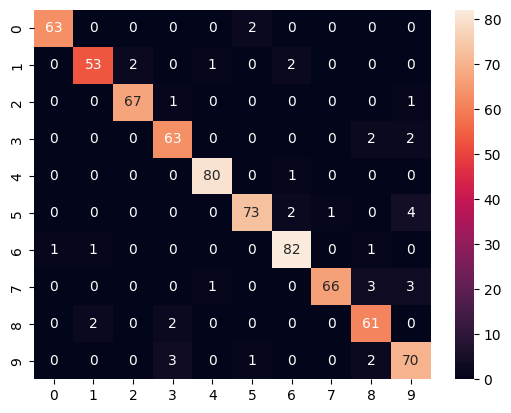

In [54]:
from sklearn.datasets import load_digits

data = load_digits()
X = data.data
y = data.target

ohe = OneHotEncoder()
y = ohe.fit_transform(y.reshape(-1, 1)).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=88)

mlp = MLP([32,16])

mlp.train(X_train, y_train, epochs=5000)

y_pred = mlp.predict(X_test)

y_test = [np.argmax(i) for i in y_test]

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, annot_kws={"size": 10})


acc = np.sum(y_test==y_pred)/len(y_pred)
print("Accuracy: {} %".format(round(acc*100),2))


#### **Reference**
https://chih-sheng-huang821.medium.com/機器學習-神經網路-多層感知機-multilayer-perceptron-mlp-含詳細推導-ee4f3d5d1b41
https://github.com/KirillShmilovich/MLP-Neural-Network-From-Scratch/blob/master/MLP.ipynb